In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
data = pd.read_csv('car_price_dataset.csv')
data

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


# Dataset Description: 

The Car Price Dataset contains 10,000 records with 10 attributes detailing used cars and their resale prices. It includes brand, model, year (2000–2023), engine size (1.0L–5.0L), fuel type, transmission, mileage, doors, owner count, and price ($2,000–$18,301). Newer cars, luxury brands, and lower mileage vehicles generally have higher prices. Automatic, diesel, and hybrid cars also tend to be more valuable. The dataset is ideal for price prediction models and market analysis, revealing trends such as depreciation patterns and the rising popularity of hybrid and electric vehicles due to environmental concerns.

## Columns in dataset: 

* Brand (object): The car manufacturer (e.g., Kia, Chevrolet, Mercedes, Audi, etc.).
* Model (object): The specific model of the car.
* Year (int64): The manufacturing year of the car (range: 2000 to 2023).
* Engine_Size (float64): The size of the engine in liters (range: 1.0L to 5.0L).
* Fuel_Type (object): The type of fuel used (e.g., Diesel, Hybrid, Electric).
* Transmission (object): The type of transmission (e.g., Manual, Automatic, Semi-Automatic).
* Mileage (int64): The total distance the car has traveled, in kilometers (range: 25 to 299,947).
* Doors (int64): The number of doors (range: 2 to 5).
* Owner_Count (int64): The number of previous owners (range: 1 to 5).
* Price (int64): The selling price of the car in USD (range: $2,000 to $18,301)

In [31]:
print("2. Dataset Overview")
print("Dataset Info:")
print(data.info())

2. Dataset Overview
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
None


In [32]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324   86322.348957      1.110097      1.422682   
min     2000.000000      1.000000      25.000000      2.000000      1.000000   
25%     2006.000000      2.000000   74649.250000      3.000000      2.000000   
50%     2012.000000      3.000000  149587.000000      3.000000      3.000000   
75%     2017.000000      4.000000  223577.500000      4.000000      4.000000   
max     2023.000000      5.000000  299947.000000      5.000000      5.000000   

             Price  
count  10000.00000  
mean    8852.96440  
std     3112.59681  
min     2000.00000  
25%     6646.00000  
50%     8858.50000  
75%    11086.50000  
max    18301.00000  


In [33]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64



3.1 Correlations


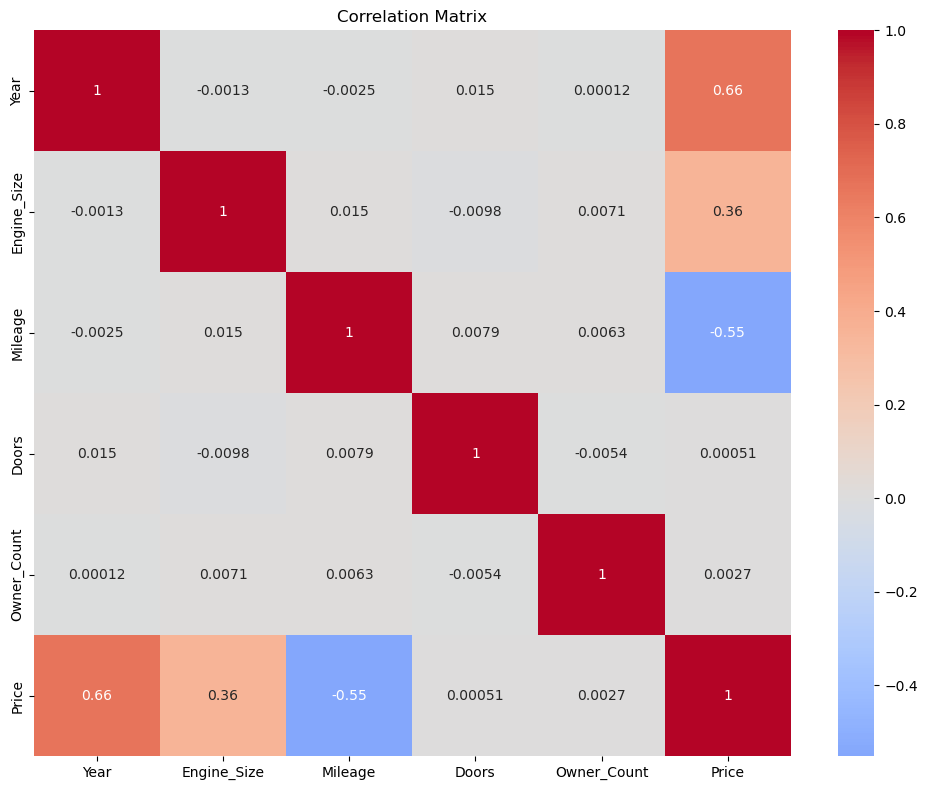

In [34]:
print("\n3.1 Correlations")
numeric_columns = ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


3.2 Visual Insights


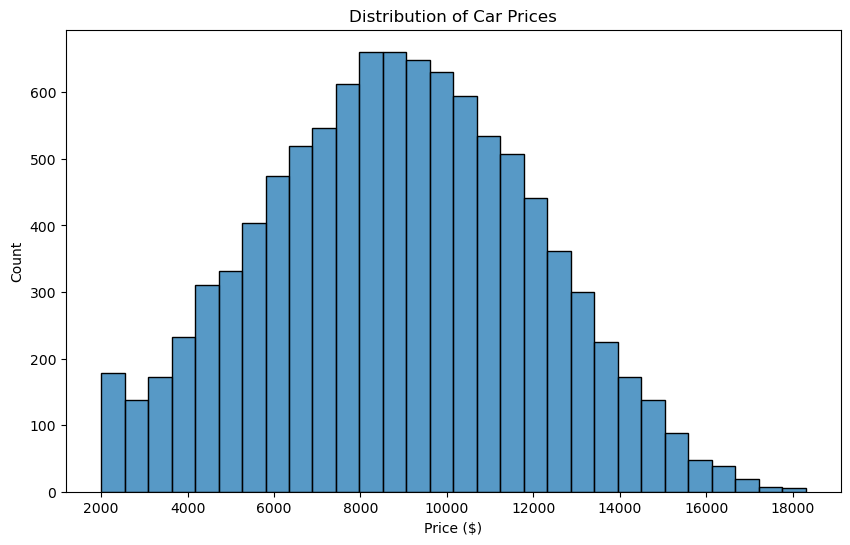

In [35]:
print("\n3.2 Visual Insights")
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.savefig('price_distribution.png') 
plt.show()


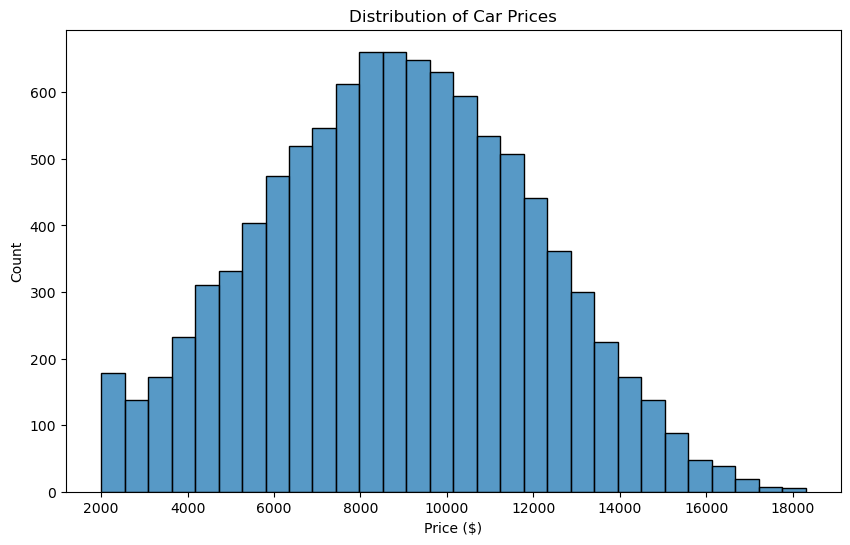

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

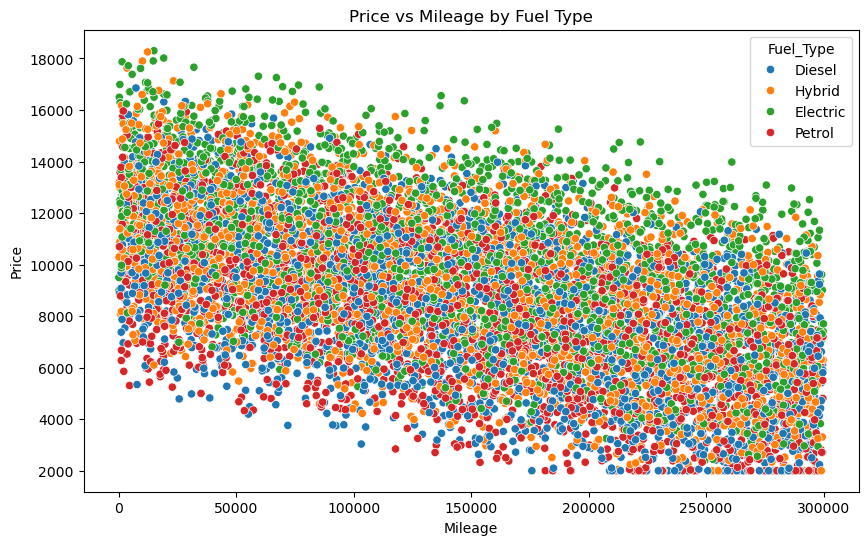

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Mileage', y='Price', hue='Fuel_Type')
plt.title('Price vs Mileage by Fuel Type')
plt.show()

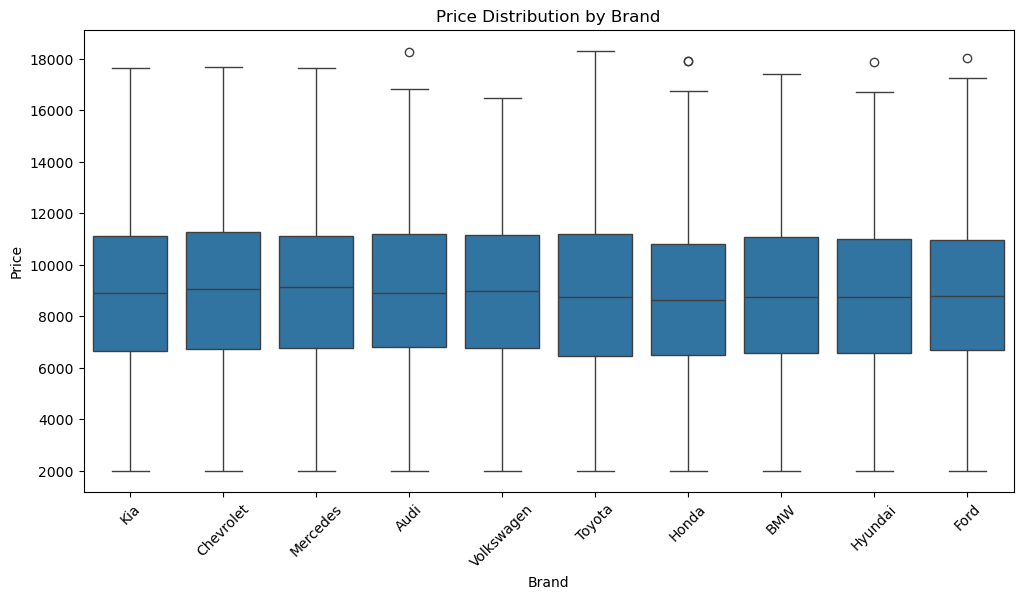

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Brand', y='Price')
plt.title('Price Distribution by Brand')
plt.xticks(rotation=45)
plt.show()

In [39]:
print("\n4. Linear Regression Model")
categorical_columns = ['Brand', 'Model', 'Fuel_Type', 'Transmission']
data_encoded = pd.get_dummies(data, columns=categorical_columns)
X = data_encoded.drop(['Price'], axis=1)
y = data_encoded['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


4. Linear Regression Model


LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [42]:
print("4.2 Results")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

4.2 Results
Mean Squared Error: 4213.91
R-squared Score: 1.00


In [43]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
                        Feature   Coefficient
21                   Model_CR-V -2.949256e+08
19                 Model_Accord -2.949256e+08
23                  Model_Civic -2.949256e+08
10                Brand_Hyundai -2.876034e+08
29                 Model_Fiesta -2.790101e+08
30                  Model_Focus -2.790101e+08
28               Model_Explorer -2.790101e+08
51  Transmission_Semi-Automatic -2.421973e+08
50          Transmission_Manual -2.421973e+08
49       Transmission_Automatic -2.421958e+08


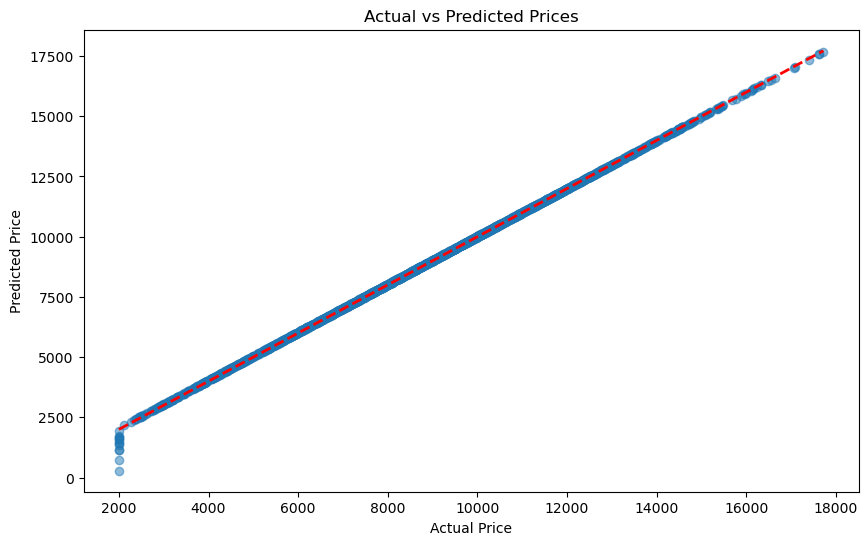

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

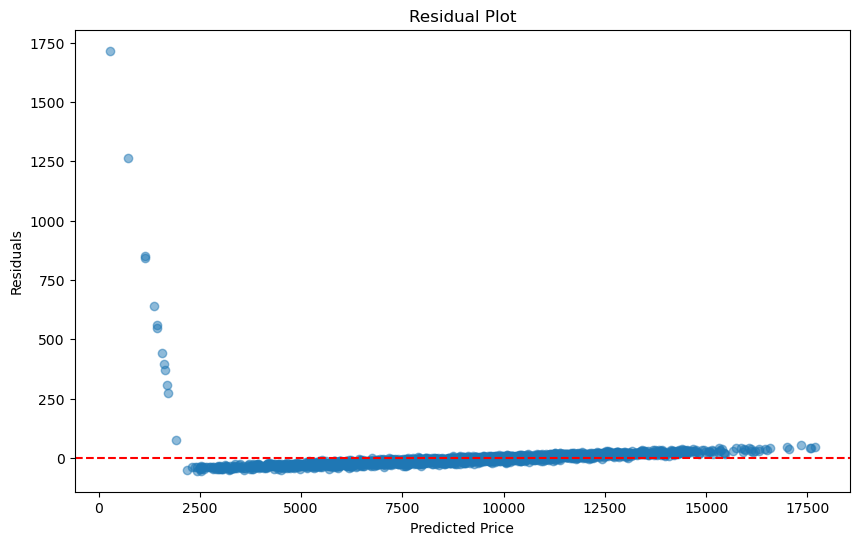

In [45]:
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [47]:
transi_type = pd.get_dummies(data['Transmission']).astype(bool)
data = pd.concat([data,transi_type ], axis=1)
print(data)

           Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price  Automatic  Manual  Semi-Automatic  
0      289944      3 

In [48]:
p_type = pd.get_dummies(data['Fuel_Type']).astype(bool)
df = pd.concat([data, p_type], axis=1)
print(df)

           Brand     Model  Year  Engine_Size Fuel_Type    Transmission  \
0            Kia       Rio  2020          4.2    Diesel          Manual   
1      Chevrolet    Malibu  2012          2.0    Hybrid       Automatic   
2       Mercedes       GLA  2020          4.2    Diesel       Automatic   
3           Audi        Q5  2023          2.0  Electric          Manual   
4     Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   
...          ...       ...   ...          ...       ...             ...   
9995         Kia    Optima  2004          3.7    Diesel  Semi-Automatic   
9996   Chevrolet    Impala  2002          1.4  Electric       Automatic   
9997         BMW  3 Series  2010          3.0    Petrol       Automatic   
9998        Ford  Explorer  2002          1.4    Hybrid       Automatic   
9999  Volkswagen    Tiguan  2001          2.1    Diesel          Manual   

      Mileage  Doors  Owner_Count  Price  Automatic  Manual  Semi-Automatic  \
0      289944      3

# DataSet Observation:
## Insights from the Car Price Dataset Visualizations
1. Price Trends by Year
    * The Price vs. Year scatter plot and violin plot reveal that newer cars (post-2015) have significantly higher prices, while       older models tend to be cheaper.
    * The median price steadily increases for recent cars, reflecting their higher market value.
2. Mileage and Price Relationship
    * The Mileage vs. Price scatter plot highlights a clear trend:
    * Cars with higher mileage tend to have lower prices, reflecting wear and depreciation.
    * Lower-mileage cars retain their value better, especially newer models.
3. Engine Size Impact
    * The Engine Size vs. Price and Engine Size vs. Mileage scatter plots show that:
    * Cars with larger engines generally have higher prices, indicating more powerful and premium vehicles.
    * Larger engines tend to have lower mileage, suggesting they may be used less frequently or preserved for special purposes.
4. Doors and Pricing
    The Price Distribution by Number of Doors plot shows that:
    * 4-door cars dominate the market and have the widest price range, likely due to their popularity and versatility.
    * 2-door cars are generally priced lower, possibly because they are less practical for families.
    * 5-door cars exhibit moderate pricing, often associated with hatchbacks or compact SUVs.
5. Ownership Patterns
    The Owner Count vs. Price plot reveals that:
    * Cars with fewer previous owners generally have higher prices, as they are perceived to be better maintained.
    * Cars with 3 or more owners tend to have lower prices, likely due to increased wear and potential maintenance issues.
6. Fuel Type and Transmission Insights
    From the earlier plots (which included fuel and transmission types):
    * Hybrid and electric cars have higher prices, reflecting their growing demand and eco-friendliness.
    * Automatic cars generally have higher resale values compared to manual cars, indicating a consumer preference for                 convenience.
7. Yearly Car Trends
    The Year vs. Number of Doors and Year-wise Car Count plots show that:
    * The production of cars peaked between 2015 and 2020, indicating higher availability of newer cars in the dataset.
    * Most recent cars are 4-door models, reflecting their practicality and market preference.

## Linear Regression Model Insights:
### Feature Coefficients and Their Impact:

1. Year: +298.86

* For every one-year increase in the car's manufacturing year, the price increases by approximately $299.
* This reflects the higher value of newer cars.

2. Mileage: -0.0201

* For every additional mile driven, the price decreases by approximately $0.02.
* This shows that higher mileage reduces the car's value, as expected.

3. Engine Size: +1,002.57

* For every 1-liter increase in engine size, the price increases by approximately $1,003.
* Larger engines indicate more powerful and premium vehicles, resulting in higher prices.

4. Doors: -2.38

* Each additional door reduces the price by approximately $2.38, which is a negligible impact.
* This suggests that the number of doors has little influence on the car price in this dataset.

5. Owner Count: +6.41

* Each additional owner increases the price by approximately $6.41.
* This is likely due to insignificant correlation in the dataset between ownership history and price.